[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W7/W7P1.ipynb)


In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels

In [2]:
def to_dataframe(text: str):
    """
    
    Parameters
    ----------
    text : this dude is a text file (a string actually).

    Returns
    -------
    Pandas dataframe

    """    
    L = []
    headers = []
    with open(text) as file:
        T = file.readlines()
        for i, t in enumerate(T):
            if i == 0:
                for header  in t[:-1].split():
                  headers.append(header)      
            else:
                L.append(t[0:-1].split())
    L = pd.DataFrame(L)
    
    L = L.apply(pd.to_numeric)
    L.columns = headers
    return L

def download_data():  ### This dude will download the dataset from the directory directly!
  !wget https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
  !unzip "/content/ch2data.zip" -d "/content/ch2data/"
  if not os.getcwd() == '/content/ch2data':
    os.chdir("ch2data")
  else:
    print(f"Current directory is now {os.getcwd()}")

download_data()

--2022-10-15 15:58:12--  https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
Resolving faculty.chicagobooth.edu (faculty.chicagobooth.edu)... 128.135.211.142
Connecting to faculty.chicagobooth.edu (faculty.chicagobooth.edu)|128.135.211.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 557379 (544K) [application/x-zip-compressed]
Saving to: ‘ch2data.zip’

ch2data.zip         100%[===================>] 544.32K   513KB/s    in 1.1s    

2022-10-15 15:58:13 (513 KB/s) - ‘ch2data.zip’ saved [557379/557379]

Archive:  /content/ch2data.zip
  inflating: /content/ch2data/d-aapl0305.txt  
  inflating: /content/ch2data/d-ibm3dx7008.txt  
  inflating: /content/ch2data/d-sp55008.txt  
  inflating: /content/ch2data/d-vix0810.txt  
  inflating: /content/ch2data/m-3m4608.txt  
  inflating: /content/ch2data/m-aaa-1911.txt  
  inflating: /content/ch2data/m-baa-1911.txt  
  inflating: /content/ch2data/m-dec125910-6111.txt  
  inflating: /c

In [3]:
data = to_dataframe("q-ko-earns8309.txt")
print(data)

        pends   anntime   value
0    19830331  19830426  0.0375
1    19830630  19830725  0.0492
2    19830930  19831102  0.0463
3    19831231  19840214  0.0379
4    19840331  19840419  0.0425
..        ...       ...     ...
102  20080930  20081015  0.8300
103  20081231  20090212  0.6400
104  20090331  20090421  0.6500
105  20090630  20090721  0.9200
106  20090930  20091020  0.8200

[107 rows x 3 columns]


In [4]:
data = data["value"]

In [5]:
data_ = data.apply(np.log)

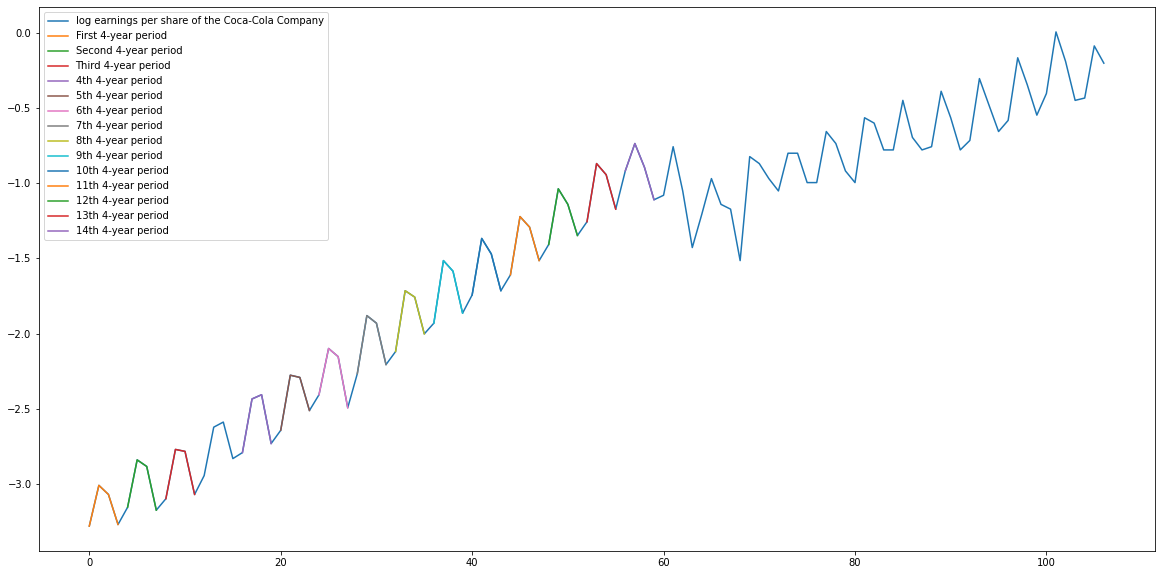

In [7]:
plt.figure(figsize =(20, 10))
plt.plot(data_, label = "log earnings per share of the Coca-Cola Company")
plt.plot(data_[0:4], label = "First 4-year period")
plt.plot(data_[4:8], label = "Second 4-year period")
plt.plot(data_[8:12], label = "Third 4-year period")
for i in range(4,15):
  plt.plot(data_[4*i:4*(i+1)], label = f"{i}th 4-year period")
plt.legend()
plt.show()

Let's look at the differenced series.

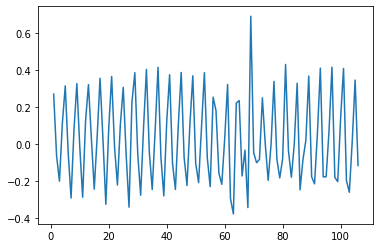

In [9]:
data_r = data_.diff()[1:]  ### we do regular differencing here
plt.plot(data_r)   ### you see there is still seasonality we can't get rid of it directly! through we get rid off the upward trend in the data!

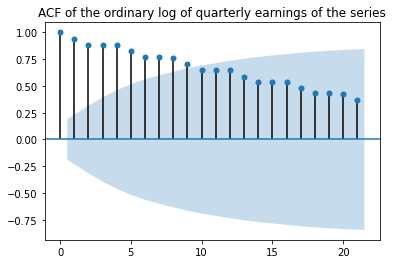

In [10]:
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_, title = "ACF of the ordinary log of quarterly earnings of the series");

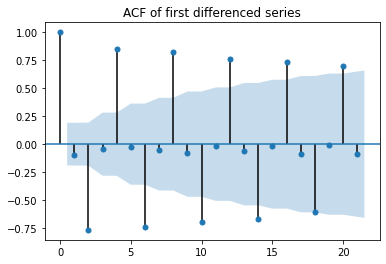

In [12]:
plot_acf(data_r, title = "ACF of first differenced series");   ####in every 4 length there is a strong correlation   

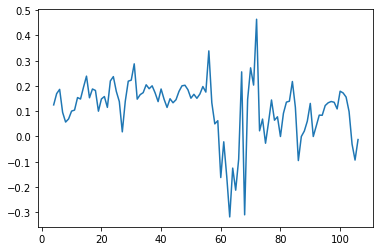

In [13]:
data_s = data_.diff(4)[4:]   ### we apply seasonal difference with period 4 to original series
plt.plot(data_s)

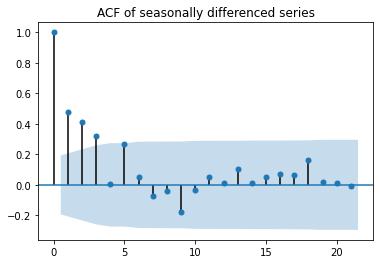

In [14]:
plot_acf(data_s, title = "ACF of seasonally differenced series");   ####we get rid of  period.

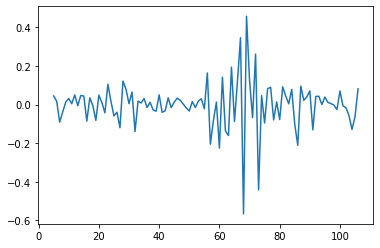

In [15]:
data_ds = data_r.diff(4)[4:]   ### We apply seasonal difference with period 4 to regularly differentiated series
plt.plot(data_ds)

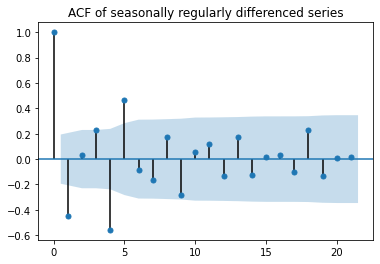

In [16]:
plot_acf(data_ds, title = "ACF of seasonally regularly differenced series"); 

#Alright What is the point?